# Dataset "tips"

Seaborn cuenta con varios datasets para explorar.

En este conjunto de datos hay información sobre propinas dejadas en un restaurante, con información sobre el día en el que se produjo, si fue en el almuerzo o la cena, el número de comensales, el sexo de la persona que dejó la propina, si era fumador o no.´

1. total_bill: cuenta total
2. tip: propina
3. sex: sexo de la persona
4. smoker: si la persona es fumadora o no
5. day: dia de la semana
6. time: tiempo donde se dejo la propina

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_tips = sns.load_dataset("tips")
display(df_tips.head(10))

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [3]:
df_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [4]:
df_tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


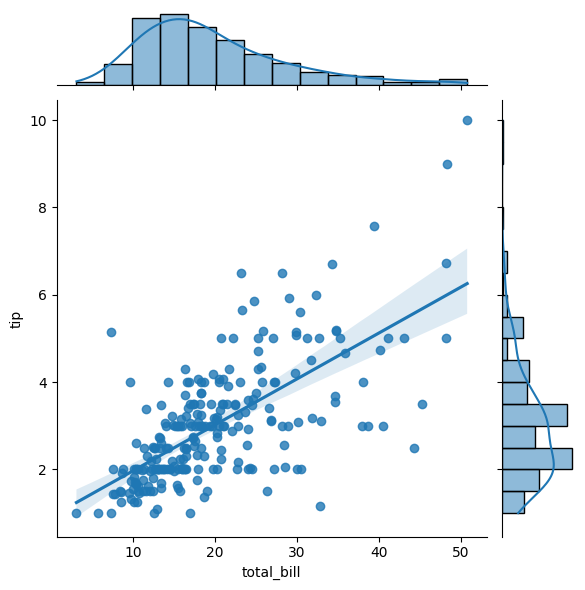

In [5]:
sns.jointplot(x=df_tips["total_bill"], y=df_tips["tip"],kind="reg")

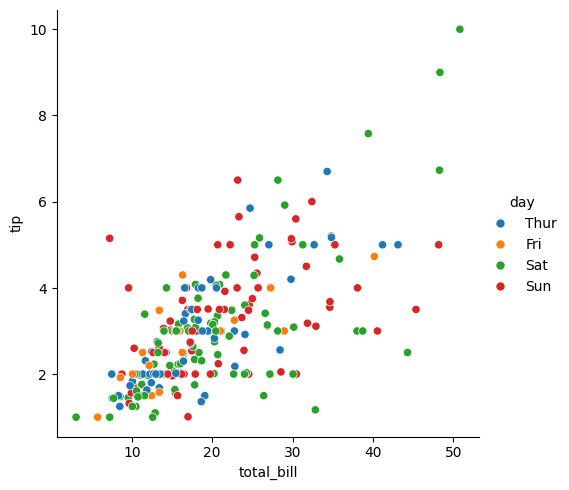

In [6]:
sns.relplot(data=df_tips, x="total_bill", y="tip", hue="day")

In [11]:
df_tips["time"].unique() # Tiempos de comida

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

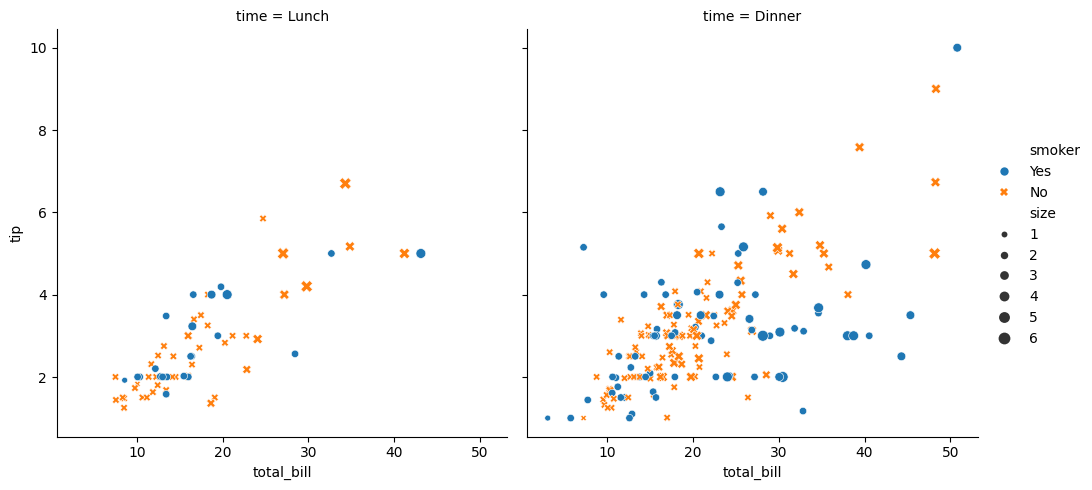

In [7]:
sns.relplot(data=df_tips,x="total_bill",y="tip",col="time",hue="smoker",style="smoker",size="size")

In [12]:
df_temporal = pd.read_csv("./Insumos/temporal.csv")
display(df_temporal.head(10))

,Mes,data science,machine learning,deep learning,categorical
0,2004-01-01,12,18,4,1
1,2004-02-01,12,21,2,1
2,2004-03-01,9,21,2,1
3,2004-04-01,10,16,4,1
4,2004-05-01,7,14,3,1
5,2004-06-01,9,17,3,1
6,2004-07-01,9,16,3,1
7,2004-08-01,7,14,3,1
8,2004-09-01,10,17,4,1
9,2004-10-01,8,17,4,1


<Axes: xlabel='Mes', ylabel='data science'>

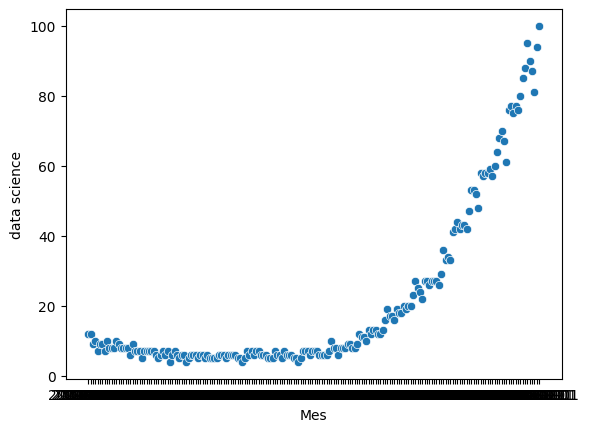

In [18]:
sns.scatterplot(df_temporal,x="Mes",y="data science")

Text(0.5, 1.0, 'Machine learning')

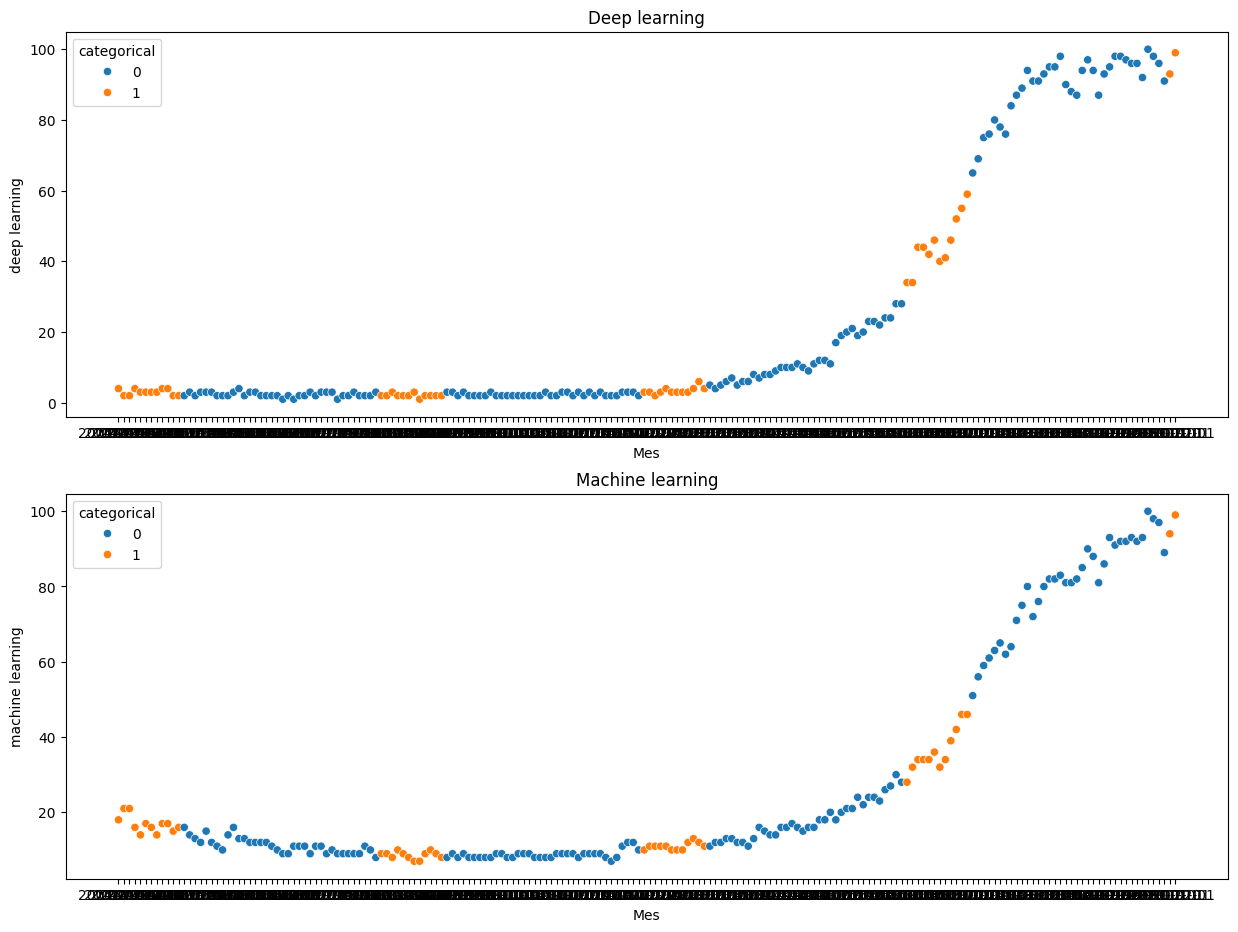

In [19]:
fig,ax = plt.subplots(2,1,figsize=(15,11))

sns.scatterplot(x="Mes",y="deep learning",data=df_temporal,hue="categorical",ax=ax[0])
ax[0].set_title("Deep learning")

sns.scatterplot(x="Mes",y="machine learning",data=df_temporal,hue="categorical",ax=ax[1])
ax[1].set_title("Machine learning")

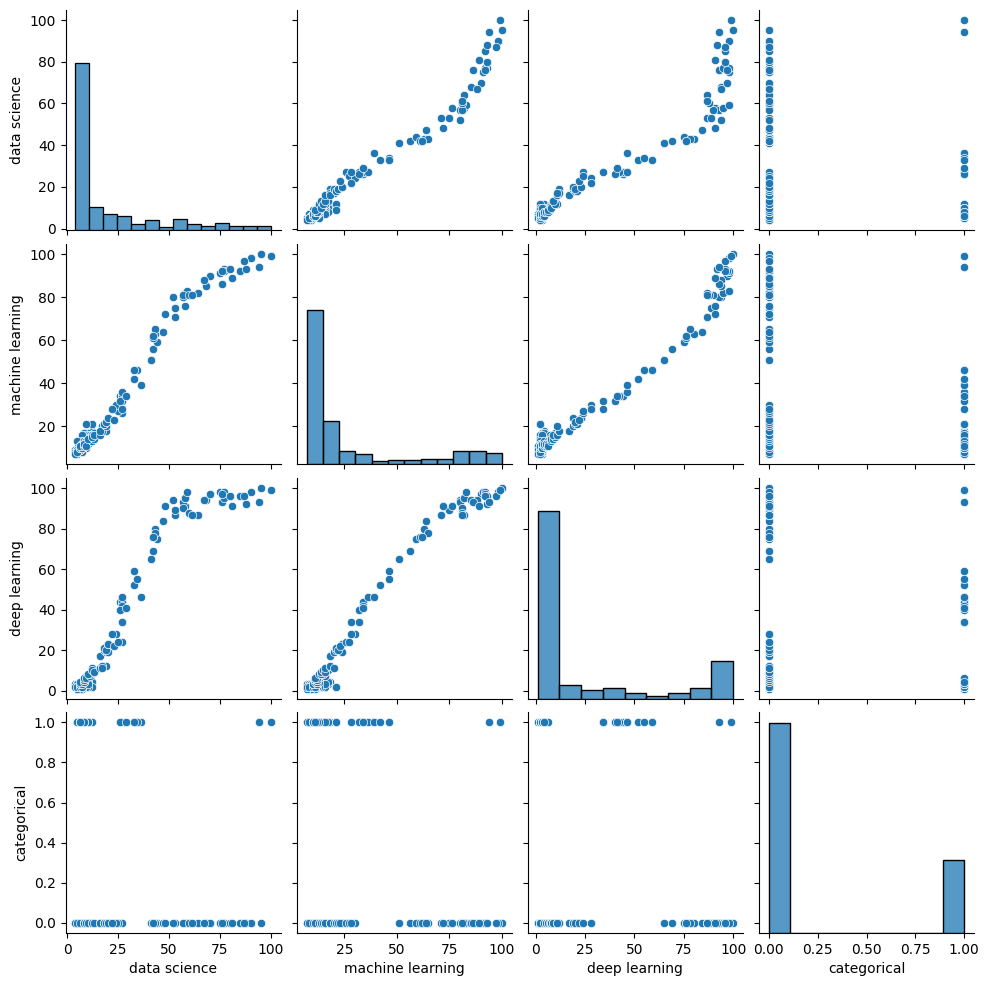

In [20]:
sns.pairplot(data = df_temporal)

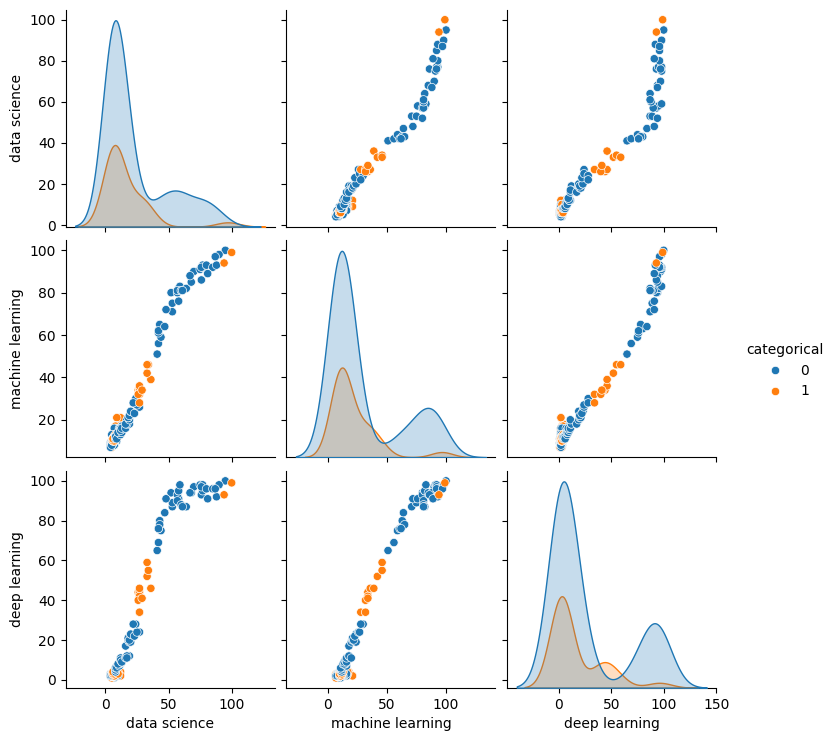

In [21]:
sns.pairplot(data = df_temporal,hue="categorical")

In [24]:
df_temporal[["data science","machine learning","deep learning","categorical"]].corr()

,data science,machine learning,deep learning,categorical
data science,1.000000,0.985733,0.964599,-0.119720
machine learning,0.985733,1.000000,0.987697,-0.127380
deep learning,0.964599,0.987697,1.000000,-0.130435
categorical,-0.119720,-0.127380,-0.130435,1.000000


<Axes: >

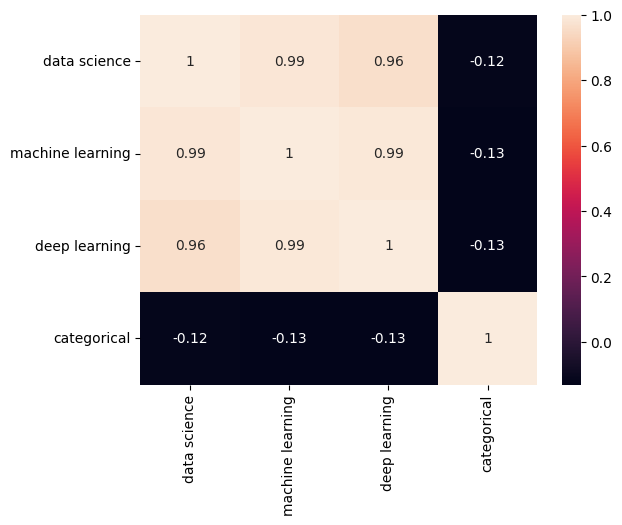

In [25]:
sns.heatmap(df_temporal[["data science","machine learning","deep learning","categorical"]].corr(),annot=True)

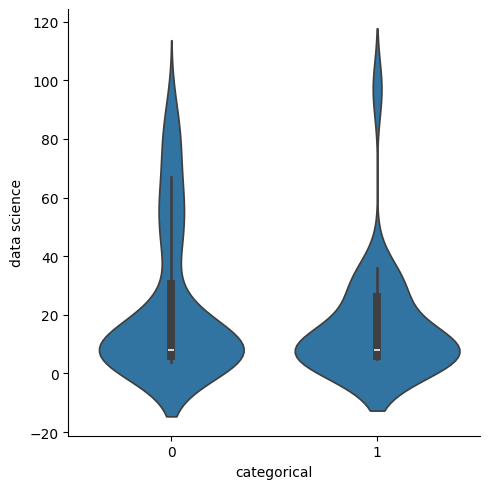

In [26]:
sns.catplot(x="categorical",y="data science",data=df_temporal,kind="violin")